# Population and median income growth in Finland 2013-2017 by postal code

## 1 Read source data from Smartdatahub

In [4]:
from sdhpy.pandas import SdhPandas
sdh = SdhPandas(store_apikey="xxxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxxxxx") # copy your API key here from https://store.smartdatahub.io/
sdg_pcp = sdh.url("https://store.smartdatahub.io/dataset/fi_sdh_postalcode_profile_finland/resource/32cd8cee-8a7b-4b6f-8e76-fe4ebf04690f").data
sdg_pcp.head()

,country,postalcode,name,municipality_number,area_sqkm,shape_length,geom_geojson,geom_geotext,area_sqkm_sea,shape_length_sea,...,sports_facilities_indoor,sports_facilities_water,sports_facilities_crosscountry,sports_facilities_boating_aviation_motorsports,sports_facilities_animal,sports_facilities_maintenance,valuedate_start,valuedate_end,valuedate,orig_extractdate
0,fi,170,Kruununhaka,91,0.713434,NaN,"{ ""type"": ""Polygon"", ""coordinates"": [ [ [ 24.9...","POLYGON ((24.954403508449108 60.1667243279494,...",1.299261,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,2015-12-31,2015-12-31,2020-03-01
1,fi,1840,Klaukkala,543,8.763116,12631.4520,"{ ""type"": ""Polygon"", ""coordinates"": [ [ [ 24.7...",POLYGON ((24.780604898947765 60.36199212108378...,8.763116,12631.4520,...,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-01,2013-12-31,2013-12-31,2020-03-01
2,fi,2610,Kilo,49,2.931106,8497.6455,"{ ""type"": ""Polygon"", ""coordinates"": [ [ [ 24.7...",POLYGON ((24.79675117126797 60.220098243699184...,2.931106,8497.6455,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01,2014-12-31,2014-12-31,2020-03-01
3,fi,4310,Tuusula Keskus,858,7.583086,NaN,"{ ""type"": ""Polygon"", ""coordinates"": [ [ [ 25.0...","POLYGON ((25.04971173564474 60.39973611677917,...",7.583086,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,2015-12-31,2015-12-31,2020-03-01
4,fi,4740,Sälinkää,505,104.157800,NaN,"{ ""type"": ""Polygon"", ""coordinates"": [ [ [ 25.2...",POLYGON ((25.20757629492882 60.649503450559656...,104.157800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,2015-12-31,2015-12-31,2020-03-01


## 2 Analyze population and median income data by area

In [5]:
data_2013_2017 = sdg_pcp[(sdg_pcp.valuedate.isin(['2013-12-31', '2017-12-31'])) & 
                         (sdg_pcp.orig_extractdate == sdg_pcp.orig_extractdate.max())] \
                        [['postalcode', 'name', 'area_sqkm', 'inhabitants_total',
                         'income_median', 'income_average', 'valuedate', 'orig_extractdate']]

data_2013_2017_merged = data_2013_2017[data_2013_2017.valuedate == '2017-12-31'].merge(
    data_2013_2017[data_2013_2017.valuedate == '2013-12-31'],
    left_on='postalcode', right_on='postalcode', how='inner')

data_2013_2017_merged['inhabitants_total_diff'] = (
    (data_2013_2017_merged['inhabitants_total_x'] - data_2013_2017_merged['inhabitants_total_y']) /
    data_2013_2017_merged['inhabitants_total_y'] * 100)

data_2013_2017_merged['income_median_diff'] = (
    (data_2013_2017_merged['income_median_x'] - data_2013_2017_merged['income_median_y']) /
    data_2013_2017_merged['income_median_y'] * 100)

data_2013_2017_merged['area_sqkm_diff'] = (
    (data_2013_2017_merged['area_sqkm_x'] - data_2013_2017_merged['area_sqkm_y']) /
    data_2013_2017_merged['area_sqkm_y'] * 100)

data_2013_2017_merged_filtered = data_2013_2017_merged[(data_2013_2017_merged.inhabitants_total_y > 0) &
                                                       (data_2013_2017_merged.income_median_y > 0) &
                                                       (abs(data_2013_2017_merged.area_sqkm_diff) < 10)]

data_2013_2017_merged_filtered.head()

,postalcode,name_x,area_sqkm_x,inhabitants_total_x,income_median_x,income_average_x,valuedate_x,orig_extractdate_x,name_y,area_sqkm_y,inhabitants_total_y,income_median_y,income_average_y,valuedate_y,orig_extractdate_y,inhabitants_total_diff,income_median_diff,area_sqkm_diff
0,20250,Pitkämäki-Muhkuri,1.442787,761.0,26068.0,31669.0,2017-12-31,2020-03-01,Pitkämäki-Muhkuri,1.442787,735.0,24109.0,28099.0,2013-12-31,2020-03-01,3.537415,8.125596,0.000000
1,25830,Västanfjärd Keskus,60.709390,491.0,20087.0,23799.0,2017-12-31,2020-03-01,Västanfjärd Keskus,60.709390,490.0,18504.0,22010.0,2013-12-31,2020-03-01,0.204082,8.554907,0.000000
3,29310,Kaasmarkku,43.827420,558.0,20955.0,23178.0,2017-12-31,2020-03-01,Kaasmarkku,42.382000,576.0,19293.0,21642.0,2013-12-31,2020-03-01,-3.125000,8.614523,3.410457
4,56710,Miettilä,34.833810,125.0,18038.0,22428.0,2017-12-31,2020-03-01,Miettilä,33.942860,134.0,16958.0,21603.0,2013-12-31,2020-03-01,-6.716418,6.368676,2.624852
5,82170,Uskali,44.077830,51.0,17439.0,19063.0,2017-12-31,2020-03-01,Uskali,44.077830,62.0,15154.0,19218.0,2013-12-31,2020-03-01,-17.741935,15.078527,0.000000


## 3 Visualize outcome with Matplotlib

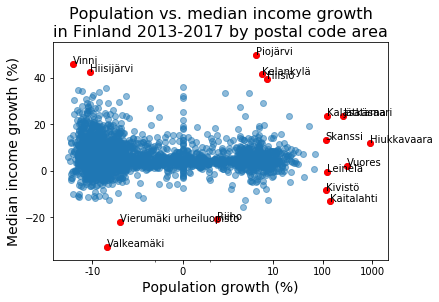

In [8]:
import matplotlib.pyplot as plt
df = data_2013_2017_merged_filtered
plt.scatter(df.inhabitants_total_diff, df.income_median_diff, alpha=0.5)
plt.xlabel('Population growth (%)', size=14)
plt.ylabel('Median income growth (%)', size=14)
plt.xscale('symlog')
plt.title('Population vs. median income growth\nin Finland 2013-2017 by postal code area', size=16)
plt.xticks([-10, 0, 10, 100, 1000], [-10, 0, 10, 100, 1000])
df_subset1 = df.query('inhabitants_total_diff > 80 or income_median_diff > 38 or income_median_diff < -20')
plt.scatter(df_subset1.inhabitants_total_diff, df_subset1.income_median_diff, color="red")
for i in range(df_subset1.shape[0]):
    plt.annotate(df_subset1.name_x.tolist()[i],
                 xy=(df_subset1.inhabitants_total_diff.tolist()[i], df_subset1.income_median_diff.tolist()[i]))
plt.savefig('figure.png', dpi=150)

## 4 Improve visualization

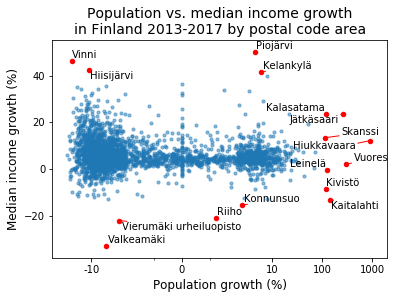

In [7]:
from adjustText import adjust_text
plt.scatter(df.inhabitants_total_diff, df.income_median_diff, alpha=0.5, s=10)
plt.xlabel('Population growth (%)', size=12)
plt.ylabel('Median income growth (%)', size=12)
plt.xscale('symlog')
plt.title('Population vs. median income growth\nin Finland 2013-2017 by postal code area', size=14)
plt.xticks([-10, 0, 10, 100, 1000], [-10, 0, 10, 100, 1000])
df_subset1 = df.query('inhabitants_total_diff > 80 or income_median_diff > 40 or income_median_diff < -13')
plt.scatter(df_subset1.inhabitants_total_diff, df_subset1.income_median_diff, color="red", s=20)
texts = [plt.text(df_subset1.inhabitants_total_diff.tolist()[i], 
                  df_subset1.income_median_diff.tolist()[i],
                  df_subset1.name_x.tolist()[i]) for i in range(df_subset1.shape[0])]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red'))
plt.savefig('figure2.png', dpi=150)